In [2]:
import networkx as nx
import sys
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [3]:
data_file = 'topo'  # 'HepPh'
G = clean_data(data_file)

In [4]:
print(nx.number_of_nodes(G), nx.number_of_edges(G))

34 42


In [5]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 6))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)
# unpack the nodes and edges
# tmp_t_SN_1, tmp_t_SN_2, tmp_t_SN_3, tmp_t_SN_4 = tmp_t_SN
# tmp_t_hub_1, tmp_t_hub_2, tmp_t_hub_3, tmp_t_hub_4 = tmp_t_hub
# determine variables values


In [6]:
r = [0.8, 0.1, 0.4, 0.2, 0.3, 0.5]
topk_list = [round(nx.number_of_nodes(G) * k) for k in r]
print(topk_list)

infect_prob = compute_probability(G) * 1.5
atio = 1.5
cover_prob = infect_prob / atio
avg = 100
max_iter = 200000


[27, 3, 14, 7, 10, 17]


## Experiment: Different Varying Node Strength (NS)

In [7]:

combined_dict, combined_dict_k_2 = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub[1][2])
# Get ranked result
opti_rank_1, ranked_nodes_1 = rank_result(combined_dict, combined_dict_k_2)
opti_rank_2, ranked_nodes_2 = rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_hub[2][3]))
opti_rank_3, ranked_nodes_3 = rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_hub[3][4]))
opti_rank_4, ranked_nodes_4= rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_hub[4][5]))

print(opti_rank_1)


[('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602)]


In [8]:
# varying_examples(
#     tmp_t_SN[0][1], tmp_t_hub[2][3])

# # [{k: varying_examples(v,v2) for k, v in x.items()
# #   for k2, v2 in y.items()} for x in tmp_t_SN for y in tmp_t_hub]
# # [{k: v for k, v in x.items()
# #   for k2, v2 in y.items()} for x in tmp_t_SN for y in tmp_t_hub]

# [{k: varying_examples(tmp_t_SN[0][1],v) for k, v in x.items()
#   } for x in tmp_t_SN ]


In [9]:
max_topk = round(max(r) * nx.number_of_nodes(G))
newmethod_1_rank = EnRenewRank(G, max_topk, 1)
print('done')
newmethod_2_rank = EnRenewRank(G, max_topk, 2)
print('done')
newmethod_3_rank = EnRenewRank(G, max_topk, 3)
print('done')
newmethod_4_rank = EnRenewRank(G, max_topk, 4)
print('done')


done
done
done
done


### SIR

In [10]:
%%time
newmethod_1_rankresult = []
newmethod_2_rankresult = []
newmethod_3_rankresult = []
newmethod_4_rankresult = []


for k in tqdm(topk_list):
    topk = k
    newmethod_1_rankresult.append(get_sir_result(G, newmethod_1_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_2_rankresult.append(get_sir_result(G, newmethod_2_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_3_rankresult.append(get_sir_result(G, newmethod_3_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_4_rankresult.append(get_sir_result(G, newmethod_4_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
print(newmethod_1_rankresult)

# ranked_nodes_1_SIR = [get_sir_result(G, ranked_nodes_1, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
ranked_nodes_2_SIR = [get_sir_result(G, ranked_nodes_2, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
ranked_nodes_3_SIR = [get_sir_result(G, ranked_nodes_3, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
ranked_nodes_4_SIR = [get_sir_result(G, ranked_nodes_4, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
print(ranked_nodes_2_SIR, ranked_nodes_3_SIR)


 17%|█▋        | 1/6 [00:00<00:01,  4.92it/s]

[0.9794117647058823, 0.361764705882353, 0.8205882352941176, 0.5808823529411765, 0.6588235294117647, 0.8802941176470588]


100%|██████████| 6/6 [00:00<00:00,  7.35it/s]


[0.9085294117647059, 0.31176470588235294, 0.7120588235294117, 0.5335294117647059, 0.6270588235294118, 0.7688235294117647] [0.9067647058823529, 0.2826470588235294, 0.7241176470588235, 0.5058823529411764, 0.6097058823529412, 0.7641176470588236]
Wall time: 6.69 s


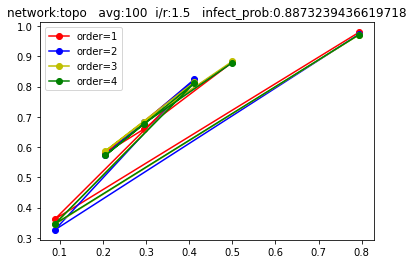

In [11]:
%matplotlib inline
plt.title('network:{}   avg:{}  i/r:{}   infect_prob:{}'.format(data_file, avg, atio, infect_prob))
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_1_rankresult, 'r-o', label='order=1')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_2_rankresult, 'b-o', label='order=2')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_3_rankresult, 'y-o', label='order=3')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_4_rankresult, 'g-o', label='order=4')
plt.legend()
plt.show()

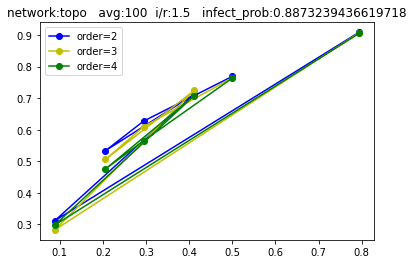

In [12]:
%matplotlib inline
plt.title('network:{}   avg:{}  i/r:{}   infect_prob:{}'.format(data_file, avg, atio, infect_prob))
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_1_SIR, 'r-o', label='order=1')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_2_SIR, 'b-o', label='order=2')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_3_SIR, 'y-o', label='order=3')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_4_SIR, 'g-o', label='order=4')
plt.legend()
plt.show()

## Experiment: Different Varying Step Neighbor (SN)

In [13]:
# Get ranked result
opti_rank_2_SN, ranked_nodes_2_SN = rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_SN[2][3]))
opti_rank_3_SN, ranked_nodes_3_SN = rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_SN[3][4]))
opti_rank_4_SN, ranked_nodes_4_SN= rank_result(*varying_examples(tmp_t_SN[0][1], tmp_t_SN[4][5]))

print(ranked_nodes_4_SN)


[('12', 0.9843856076035302), ('14', 0.9792106056040973), ('13', 0.932777488275143), ('16', 0.8977943460702082), ('24', 0.8111574222507212), ('5', 0.7280832095096585), ('11', 0.620075368276807), ('2', 0.5285412262156451), ('8', 0.5143667967364314), ('21', 0.40088267745494655), ('29', 0.2787323405880107), ('9', 0.1509271237602413), ('22', 0.1509271237602413), ('27', 0.14688368400158797), ('28', 0.14688368400158797), ('7', 0.0041339396444812215), ('19', 0.0041339396444812215), ('15', -0.0041339396444812215), ('25', -0.14688368400158797), ('32', -0.14688368400158797), ('10', -0.2787323405880107), ('26', -0.2787323405880107), ('6', -0.31996394772419995), ('20', -0.40088267745494655), ('3', -0.5143667967364314), ('23', -0.7187810533289167), ('17', -0.8111574222507212), ('18', -0.8111574222507212), ('33', -0.8111574222507212), ('4', -0.8977943460702082), ('31', -0.8977943460702082), ('34', -0.8977943460702082), ('30', -0.950510604870385), ('1', -0.9980928162746344)]


In [14]:
ranked_nodes_2_SN_SIR = [get_sir_result(G, ranked_nodes_2_SN, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
ranked_nodes_3_SN_SIR = [get_sir_result(G, ranked_nodes_3_SN, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]
ranked_nodes_4_SN_SIR = [get_sir_result(G, ranked_nodes_4_SN, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in tqdm(topk_list)]

100%|██████████| 6/6 [00:00<00:00,  6.86it/s]


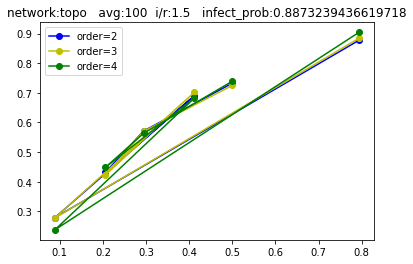

In [15]:
%matplotlib inline
plt.title(f'network:{data_file}   avg:{avg}  i/r:{atio}   infect_prob:{infect_prob}')
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_1_SIR, 'r-o', label='order=1')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_2_SN_SIR, 'b-o', label='order=2')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_3_SN_SIR, 'y-o', label='order=3')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), ranked_nodes_4_SN_SIR, 'g-o', label='order=4')
plt.legend()
plt.show()


## Misc

In [16]:
nx.degree_centrality(G)
nx.degree(G)
G.degree(weight='weight')


DegreeView({'1': 1.571, '2': 17.626, '3': 18.079, '4': 9.182, '5': 29.038, '15': 17.566, '6': 19.016, '7': 17.24, '8': 16.341, '10': 9.111, '9': 7.305999999999999, '14': 18.436, '11': 15.136000000000001, '12': 34.978, '13': 8.792, '22': 28.059, '32': 11.168, '16': 13.919999999999998, '24': 17.512, '17': 7.785, '18': 3.391, '28': 40.637, '19': 7.331999999999999, '20': 7.028, '29': 11.075, '21': 19.35, '30': 4.25, '23': 29.957, '31': 20.381, '25': 3.6159999999999997, '26': 30.902, '27': 88.175, '33': 30.81, '34': 3.5060000000000002})